# Plot Data on a Map

### Work in progress notebook

First thing to do to enable this notebook to run is to makes sure that the required packages are imported:

In [33]:
# Import the required packages:

import os
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Next up is to select the dataset which contain the data that is to be plotted:

In [34]:
# Open a dataset using the OPENDAP-url

ds = xr.open_dataset('https://thredds.met.no/thredds/dodsC/remotesensingenvisat/asar-doppler/2012/01/27/ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc')
ds

<xarray.Dataset> Size: 45MB
Dimensions:                   (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/22)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswaths                 (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    wind_speed                (y, x) float32 2MB ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

This enables the possibility to easily plot the desired variables contained within the dataset.

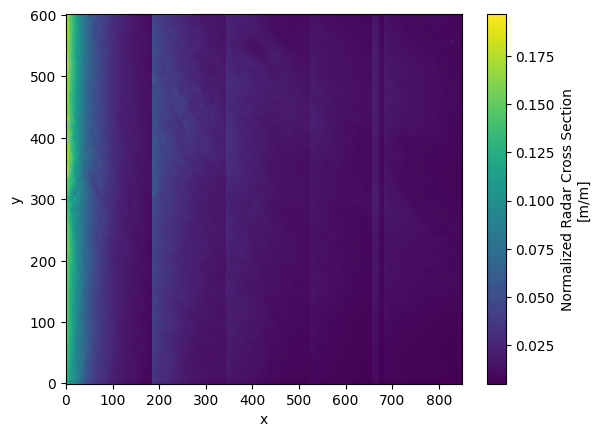

In [35]:
# Plotting a selected variable from the dataset opened above:

ds.sigma0.plot()
plt.show()

Below is a code snippet which easily extracts the wanted files from "Downloads" (given a recognicable part of their filenames) meant for extracting files which have been downloaded. This can be used when files have been dowloaded from ADD THE DATA.MET.NO WHEN IT IS AVAILABLE THERE...

In [36]:
# how to open data when downloaded from the staging page: https://data-staging.met.no/metsis/elements/no-met-staging-e19b9c36-a9dc-4e13-8827-c998b9045b54/search

# Get the path of the home directory
home_dir = os.path.expanduser("~")

# Use os.path.join to combine paths
path2files = os.path.join(home_dir, "Downloads") # "Dowloads" --> path to files

# Specify something to recognice the desired nc-files, extract them and put them in a list
desired_files_paths = glob.glob(os.path.join(path2files, "ASA_*.nc"))
# print(desired_files_paths)

''' ###################### To uncomment this snippet place the marker here and press: ctrl + k + c. To comment it out again press: ctrl + k + u ####################

# Create a list of desired files
files2open = []
for i in range(len(desired_files_paths)):
    ith_file = desired_files_paths[i].replace(path2files+'/', '')
    print(ith_file)
    files2open.append(ith_file)

print(files2open)
#'''

# Open the first dataset
ds = xr.open_dataset(desired_files_paths[0])
# print(desired_files_paths[0])

# Interactive overview of the dataset
ds

<xarray.Dataset> Size: 45MB
Dimensions:                   (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/22)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswaths                 (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    wind_speed                (y, x) float32 2MB ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

In [37]:
# Same file that is inspected above
# ds = xr.open_dataset('ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc') # It is altered as seen above - this is then the old version
# ds

## Plotting Function

Below is an easy to use plotting function which visualize your desired data variable on a map. There is also possible to set the spatial extent of the plot yourself - default is just plotting the spatial extent of the variable itself as defined in the metadata.

In [38]:
# Original plotting function
'''
def plotting_variables_on_a_map(variable, number_of_colorbar_intervals, lat_min = ds.geospatial_lat_min, lat_max = ds.geospatial_lat_max, lon_min = ds.geospatial_lon_min, lon_max = ds.geospatial_lon_max):  # var_min, var_max, var_step

    # Create a linear space for latitude and longitude
    lat = np.linspace(ds.geospatial_lat_min, ds.geospatial_lat_max, ds.sizes['y'])
    lon = np.linspace(ds.geospatial_lon_min, ds.geospatial_lon_max, ds.sizes['x'])

    # Create a new xarray DataArray with latitude and longitude as coordinates
    variable_with_coords = xr.DataArray(variable.values, coords=[('lat', lat), ('lon', lon)], dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    # Now select your slice - defined by the latitudinal and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(x=slice(ds.geospatial_lon_min, ds.geospatial_lon_max), y=slice(ds.geospatial_lat_min, ds.geospatial_lat_max))

    # Ready to plot the variable on a map using subplot package of matplotlib.pyplot
    fig, ax = plt.subplots(1, figsize=(7, 7))
    fig.suptitle(f'{plotable_variable.long_name}', fontsize = 15)
    ax.axis('off')   # Turn off axes

    # Set the projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()  # Add coastlines

    # Create the gridlines and configure the labels
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = True   # Default
    gl.left_labels = True     # Default
    gl.top_labels = False     # Not default
    gl.right_labels = False   # Not default

    # Defining var_min, var_max and var_step --- using the variable attribute minmax to extract var_min and var_max
    var_min = int(plotable_variable.minmax.split(' ')[0])
    var_max = int(plotable_variable.minmax.split(' ')[1])
    
    var_step = ((var_max - var_min) / number_of_colorbar_intervals)

    var_max = int(plotable_variable.minmax.split(' ')[1]) + var_step   # redefining the max val to improve visuals of colorbar around center

    # Plot the data
    plotable_variable.plot.contourf(ax=ax, x='x', y='y',
                        extend='neither',
                        norm=TwoSlopeNorm(vmin=var_min, vcenter=0, vmax=var_max),
                        levels=np.arange(var_min, var_max, var_step),      
                        cbar_kwargs = {'label': f'[{plotable_variable.units}]'}
                        )

    # Setting the extent on the map that is plotted
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlim(lon_min, lon_max)

    plt.tight_layout()
    plt.show()

    return
    #'''
print('More primitive version of the plotting_variables_on_a_map function. Visuals are not necessarily always optimal.')

More primitive version of the plotting_variables_on_a_map function. Visuals are not necessarily always optimal.


In [39]:
def plotting_variables_on_a_map(variable, number_of_colorbar_intervals = 100, 
                                lat_min = ds.geospatial_lat_min, lat_max = ds.geospatial_lat_max, 
                                lon_min = ds.geospatial_lon_min, lon_max = ds.geospatial_lon_max,
                                fractional_title_spacing = 0.05,
                                title_fontsize = 15,
                                cbar_label_fontsize = 12):

    # Create a linear space for latitude and longitude
    lat = np.linspace(ds.geospatial_lat_min, ds.geospatial_lat_max, ds.sizes['y'])
    lon = np.linspace(ds.geospatial_lon_min, ds.geospatial_lon_max, ds.sizes['x'])

    # Create a new xarray DataArray with latitude and longitude as coordinates
    variable_with_coords = xr.DataArray(variable.values, coords=[('lat', lat), ('lon', lon)], dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    # Now select your slice - defined by the latitudinal and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(x=slice(ds.geospatial_lon_min, ds.geospatial_lon_max), y=slice(ds.geospatial_lat_min, ds.geospatial_lat_max))

    # Ready to plot the variable on a map using subplot package of matplotlib.pyplot
    # Create the main plot and set the projection
    fig, ax = plt.subplots(1, figsize=(7, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.axis('off')   # Turn off axes
    ax.coastlines()  # Add coastlines
    
    # Add a black rectangle around the map
    rectangle = plt.Rectangle((lon_min, lat_min), lon_max-lon_min, lat_max-lat_min,
                            fill=None, edgecolor='black', linewidth=2)
    ax.add_patch(rectangle)
    

    # Create the gridlines and configure the labels
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = True   # Default
    gl.left_labels = True     # Default
    gl.top_labels = True      # Default
    gl.right_labels = False   # Not default

    # Defining var_min, var_max and var_step --- using the variable attribute minmax to extract var_min and var_max
    var_min = int(plotable_variable.minmax.split(' ')[0])
    var_max = int(plotable_variable.minmax.split(' ')[1])
    
    var_step = ((var_max - var_min) / number_of_colorbar_intervals)

    var_max = int(plotable_variable.minmax.split(' ')[1]) + var_step   # redefining the max val to improve visuals of colorbar around center

    # Add features for land and ocean
    ax.add_feature(cfeature.LAND, facecolor='tan', zorder=2)     # Tan color for land - Placed as number three in line for plotting
    # ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)    # Light blue color for ocean
    ax.add_feature(cfeature.OCEAN, facecolor='grey', zorder=0)    # Light blue color for ocean - Placed first in luine for plotting
    
    # Plot the data
    cax = plotable_variable.plot.contourf(ax=ax, x='x', y='y',
                        extend='neither',
                        norm=TwoSlopeNorm(vmin=var_min, vcenter=0, vmax=var_max),
                        levels=np.arange(var_min, var_max, var_step),
                        add_colorbar=False,  # Do not automatically add colorbar
                        zorder = 1
                        )

    # Create an inset axes for the colorbar
    cbar_ax = inset_axes(ax,
                        width="5%",  # width = 5% of parent_bbox width
                        height="100%",  # height : 100% of parent_bbox height
                        loc='lower left',
                        bbox_to_anchor=(1.05, 0., 1, 1),
                        bbox_transform=ax.transAxes,
                        borderpad=0
                        )

    # Create colorbar
    cbar = fig.colorbar(cax, cax=cbar_ax, orientation='vertical')
    cbar.set_label(f'[{plotable_variable.units}]', fontsize = cbar_label_fontsize)  # Extract units from the plotted variable and use as label for colorbar

    # Set and adjust title
    mid_lat = (lat_min + lat_max) / 2
    mid_lon = (lon_min + lon_max) / 2
    ax.text(mid_lon, lat_max + ((lat_max - lat_min) * fractional_title_spacing), f'{plotable_variable.long_name}',
            fontsize=title_fontsize, ha='center')

    # Setting the extent on the map that is plotted
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlim(lon_min, lon_max)

    plt.show()

    return

## Plotting Examples

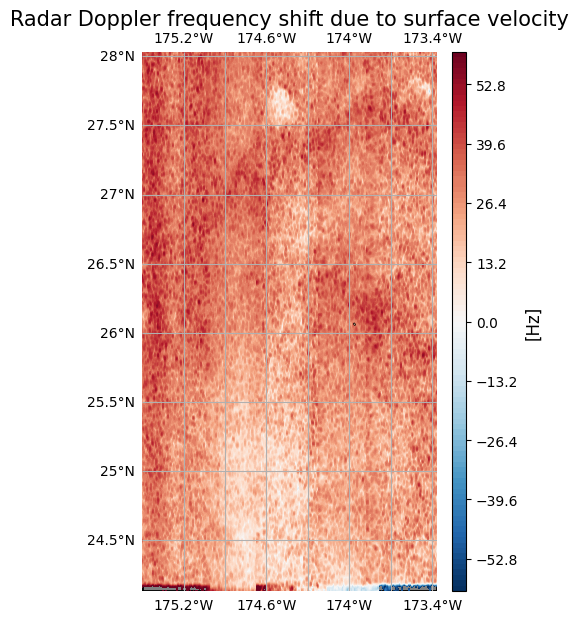

In [40]:
# Plotting the desired variable within its geographical extent - By default using the metadata for the geographical extent as lat/lon min/max values.

# # Plotting fdg - old name
# plotting_variables_on_a_map(variable = ds.fdg,
#                             number_of_colorbar_intervals = 100,  # Default value
#                             title_fontsize = 15,                 # Default value
#                             cbar_label_fontsize = 12             # Default value
#                             )

# Plotting geophysical_doppler - new name
plotting_variables_on_a_map(variable = ds.geophysical_doppler,
                            number_of_colorbar_intervals = 100,  # Default value
                            title_fontsize = 15,                 # Default value
                            cbar_label_fontsize = 12             # Default value
                            )

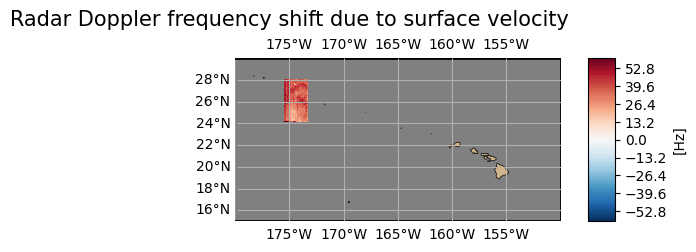

In [41]:
# Determine the spatial extent for yourself:

# # Plotting fdg - Old name
# plotting_variables_on_a_map(variable = ds.fdg, 
#                             lat_min = 15, lat_max = 30,
#                             lon_min = -200, lon_max = -150,
#                             number_of_colorbar_intervals = 100,  # Default value
#                             fractional_title_spacing = 0.20,     # Default 0.05
#                             title_fontsize = 15,                 # Default value
#                             cbar_label_fontsize = 10             # Default 12
#                             )

# Plotting geophysical_doppler - New name
plotting_variables_on_a_map(variable = ds.geophysical_doppler, 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100,  # Default value
                            fractional_title_spacing = 0.20,     # Default 0.05
                            title_fontsize = 15,                 # Default value
                            cbar_label_fontsize = 10             # Default 12
                            )

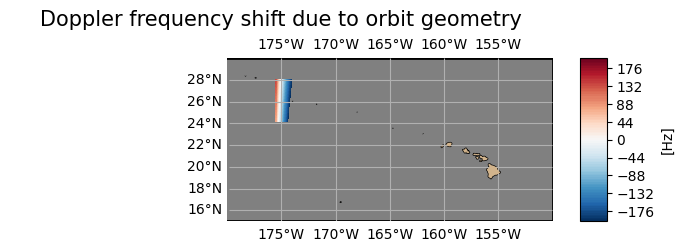

In [42]:
# # Plotting fgeo - Old name
# plotting_variables_on_a_map(variable = ds.fgeo, 
#                             # lat_min = 20, lat_max = 50,
#                             # lon_min = -85, lon_max = -65 
#                             lat_min = 15, lat_max = 30,
#                             lon_min = -200, lon_max = -150,
#                             number_of_colorbar_intervals = 100,  # Default value
#                             fractional_title_spacing = 0.20,     # Default 0.05
#                             title_fontsize = 15,                 # Default value
#                             cbar_label_fontsize = 10             # Default 12
#                             )

# Plotting geometric_doppler - New Name
plotting_variables_on_a_map(variable = ds.geometric_doppler, 
                            # lat_min = 20, lat_max = 50,
                            # lon_min = -85, lon_max = -65 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100,  # Default value
                            fractional_title_spacing = 0.20,     # Default 0.05
                            title_fontsize = 15,                 # Default value
                            cbar_label_fontsize = 10             # Default 12
                            )

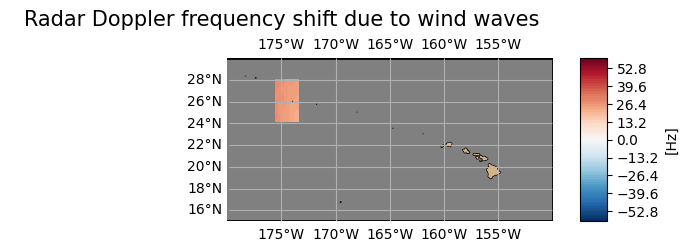

In [43]:
# # Plotting fww - Old Name
# plotting_variables_on_a_map(variable = ds.fww,
#                             lat_min = 15, lat_max = 30,
#                             lon_min = -200, lon_max = -150,
#                             number_of_colorbar_intervals = 100,  # Default value
#                             fractional_title_spacing = 0.20,     # Default 0.05
#                             title_fontsize = 15,                 # Default value
#                             cbar_label_fontsize = 10             # Default 12
#                             )

# Plotting wind_waves_doppler - New Name
plotting_variables_on_a_map(variable = ds.wind_waves_doppler,
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100,  # Default value
                            fractional_title_spacing = 0.20,     # Default 0.05
                            title_fontsize = 15,                 # Default value
                            cbar_label_fontsize = 10             # Default 12
                            )


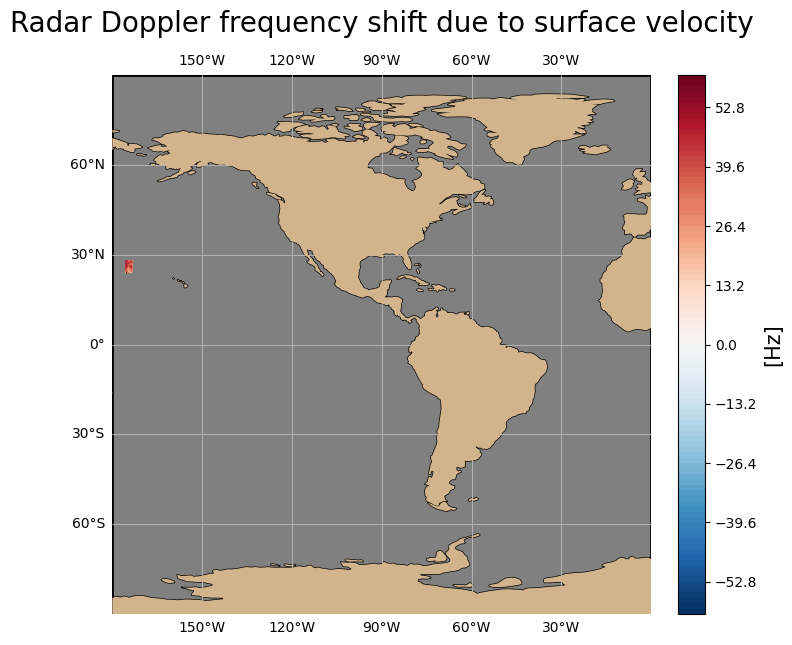

In [44]:
# Plotting half the world for the sake of it

# # Plotting fdg - Old Name
# plotting_variables_on_a_map(variable = ds.fdg, 
#                             lat_min = -90, lat_max = 90,
#                             lon_min = -180, lon_max = 0, 
#                             number_of_colorbar_intervals = 100,  # Default value
#                             fractional_title_spacing = 0.08,     # Default 0.05
#                             title_fontsize = 20,                 # Default 15
#                             cbar_label_fontsize = 15             # Default 12
#                             )
# Plotting geophysical_doppler - Ne Name
plotting_variables_on_a_map(variable = ds.geophysical_doppler, 
                            lat_min = -90, lat_max = 90,
                            lon_min = -180, lon_max = 0, 
                            number_of_colorbar_intervals = 100,  # Default value
                            fractional_title_spacing = 0.08,     # Default 0.05
                            title_fontsize = 20,                 # Default 15
                            cbar_label_fontsize = 15             # Default 12
                            )

## Plotting another file with a Polar projection

In [45]:
def ArcticPlot_variables_on_a_map(dataset, 
                                variable,
                                map_start_longitude = -180,
                                map_end_longitude = 180,
                                map_edge_latitude = 60,
                                map_center_latitude = 90,
                                fractional_title_spacing = 0.05,
                                title_fontsize = 15):

    # Create a linear space for latitude and longitude
    lat = np.linspace(dataset.geospatial_lat_min, dataset.geospatial_lat_max, dataset.sizes['y'])
    lon = np.linspace(dataset.geospatial_lon_min, dataset.geospatial_lon_max, dataset.sizes['x'])

    # Create a new xarray DataArray with latitude and longitude as coordinates
    variable_with_coords = xr.DataArray(variable.values, coords=[('lat', lat), ('lon', lon)], dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    # Now select your slice - defined by the latitudinal and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(x=slice(dataset.geospatial_lon_min, dataset.geospatial_lon_max), y=slice(dataset.geospatial_lat_min, dataset.geospatial_lat_max))

    fig, ax = plt.subplots(1, figsize=(10, 6))
    fig.suptitle(f'{variable.long_name}', fontsize = title_fontsize)
    ax.axis('off')   # These do no longer make sense and are just a nuisance

    # Set the projection
    ax = plt.axes(projection=ccrs.NorthPolarStereo())   # Selecting a projection with the North Pole in its center.
    ax.coastlines()                                            # Adding coastlines
    ax.set_extent([map_start_longitude, map_end_longitude, map_edge_latitude, map_center_latitude], crs=ccrs.PlateCarree()) # Lower Boundry of 65 deg North to just evaluate the Arctic.

    # Add features for land and ocean
    ax.add_feature(cfeature.LAND, facecolor='tan', zorder=2)     # Tan color for land - Placed as number three in line for plotting
    # ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)    # Light blue color for ocean
    ax.add_feature(cfeature.OCEAN, facecolor='grey', zorder=0)    # Light blue color for ocean - Placed first in line for plotting

    # For contourf
    # var_min = int(variable.min())
    # var_max = int(variable.max())
    # var_step = (var_max - var_min) / steps

    # Plot the data
    # variable.plot.contourf(ax=ax, x='longitude', y='latitude',
    #                     transform=ccrs.PlateCarree(),  # added transform argument
    #                     extend='both',
    #                     levels=np.arange(var_min, var_max, var_step),      
    #                     cbar_kwargs = {'label': f'[{variable.units}]'},
    #                     cmap='Blues_r',                                               # "_r" --> inverse of the selected cmap
    #                     zorder = 1                                                    # Placed second in line for plotting
    #                     )
    
    plotable_variable.plot.pcolormesh(ax=ax, x='x', y='y',
                        transform=ccrs.PlateCarree(),  # added transform argument
                        extend='neither',
                        # levels=np.arange(var_min, var_max, var_step),      
                        cbar_kwargs = {'label': f'[{variable.units}]'},
                        # cmap='Blues_r',                                               # "_r" --> inverse of the selected cmap
                        zorder = 1                                                    # Placed second in line for plotting
                        )


    
    gl = ax.gridlines(draw_labels=True)

    plt.tight_layout()
    plt.show()

    return

In [46]:
# Downloaded
# ds_arctic = xr.open_dataset('ASA_WSDH2PRNMI20120322_111545_000623843113_00023_52623_0000.nc')  # Downloaded

# OPENDAP
ds_arctic = xr.open_dataset('https://thredds.met.no/thredds/dodsC/remotesensingenvisat/asar-doppler/2012/03/22/ASA_WSDH2PRNMI20120322_111545_000623843113_00023_52623_0000.nc')  # OPeNDAP
ds_arctic

<xarray.Dataset> Size: 46MB
Dimensions:                   (y: 611, x: 847)
Dimensions without coordinates: y, x
Data variables: (12/22)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswaths                 (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    wind_speed                (y, x) float32 2MB ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-03-22T11:15:45.996631
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      640
    ytime:                      2012-03-22T11:15:45.996631Z
    ytime_slc:                  2012-03-22T11:15:44.997749
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

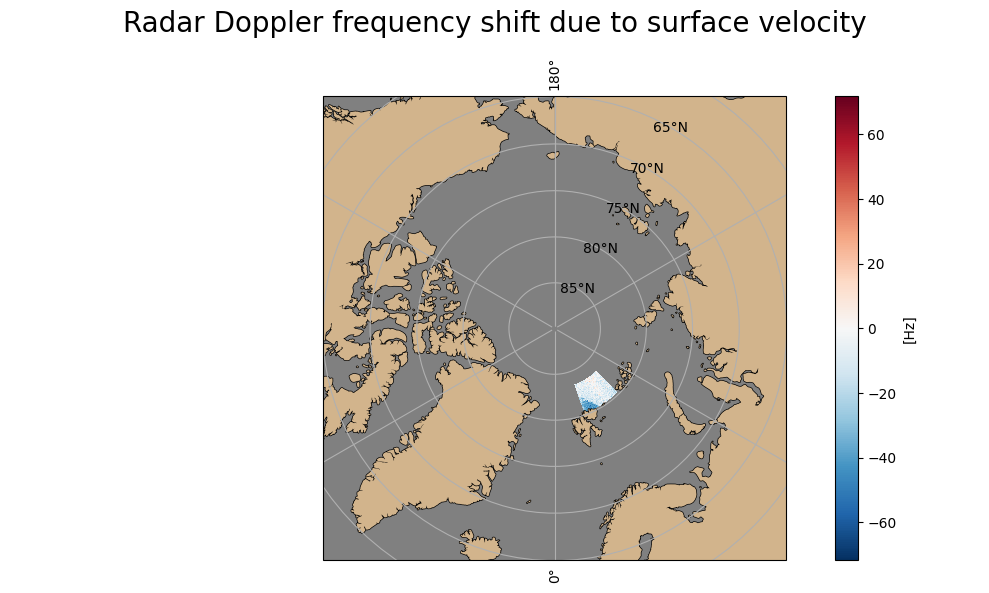

In [47]:
# The entire Arctic
ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_start_longitude = -180,
                            map_end_longitude = 180,
                            map_edge_latitude = 65,    # Default 60
                            map_center_latitude = 90,  # Default 90
                            title_fontsize = 20        # Default 15
                            )

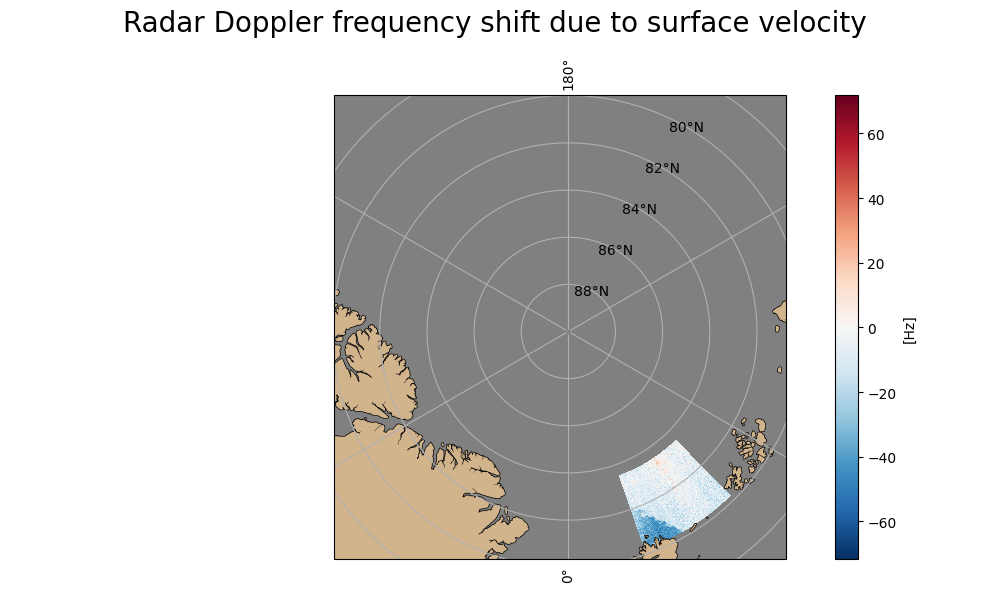

In [48]:
# North of Svalbard
ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_start_longitude = -180,
                            map_end_longitude = 180,
                            map_edge_latitude = 80,    # Default 60
                            map_center_latitude = 90,  # Default 90
                            title_fontsize = 20        # Default 15
                            )

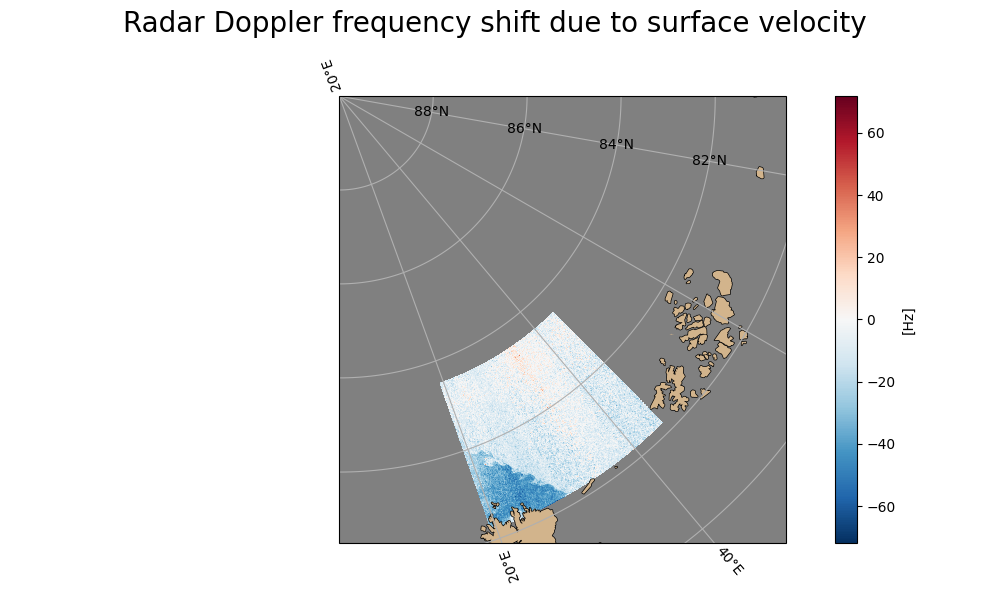

In [49]:
# A quarter of the sphere covering the desired area
ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_start_longitude = 0,
                            map_end_longitude = 90,    
                            map_center_latitude = 90,  # Default 90
                            map_edge_latitude = 80.5,    # Default 60
                            title_fontsize = 20        # Default 15
                            )

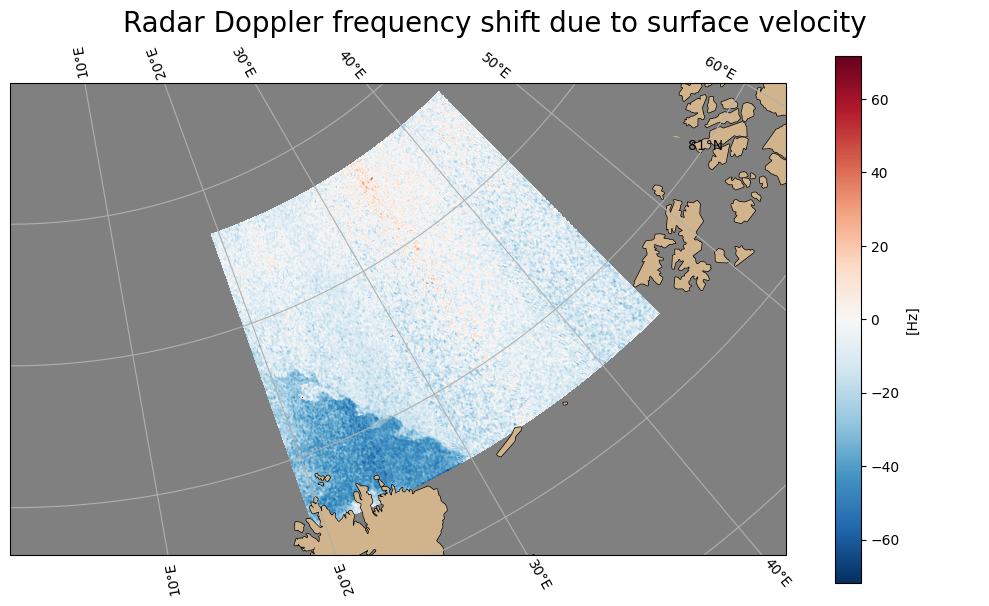

In [50]:
# Zooming into the desired area
ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_start_longitude = 0,
                            map_end_longitude = 60,    
                            map_center_latitude = 81,  # Default 90
                            map_edge_latitude = 80.5,    # Default 60
                            title_fontsize = 20        # Default 15
                            )